# Chi Square Test

**Goal:** Conduct and experiment to determine how long we need to run the experiment in order to detect a significant difference between control abd treatment groups, then run an experiment to evaluate the results using a chi-square test.

- Power calculation to determine the number of observations
- Use the cumulative density function to determine the experiment length. 
- Build a contigency table with the experiment results.
- Conduct a chi-square test to analyze the hypothesis. 


In [12]:
import math

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import plotly.express as px 
import scipy
from pymongo import MongoClient
from statsmodels.stats.contingency_tables import Table2x2
from statsmodels.stats.power import GofChisquarePower

#### Calculate Power

- To get the meaningfull information - number of observations you need to include in the experiment.

In [16]:
chi_square_power = GofChisquarePower()
group_size = math.ceil(chi_square_power.solve_power(effect_size=0.2, alpha=0.05, power=0.8))

print("Group size:", group_size)
print("Total # of applicants needed:", group_size * 2)

Group size: 197
Total # of applicants needed: 394


- From the results, if we want to detect an effect size of 0.2 we need a group size of about 200 people.

 - Since our experiment has two conditions (treatment and control, or email and no email), that means we need a total of about 400 applicants in our experiment.

#### Power Curve Plot

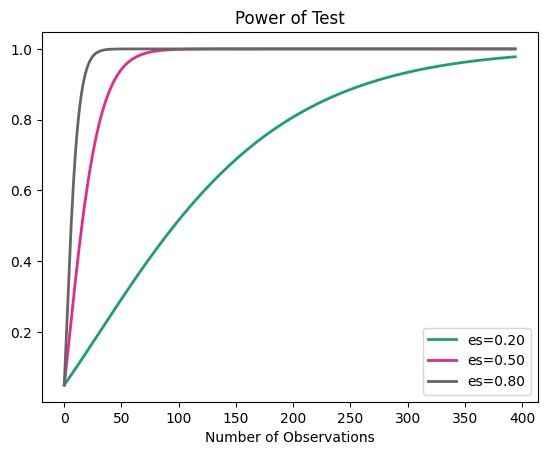

In [17]:
n_observations = np.arange(0, group_size * 2 + 1)
effect_sizes = np.array([0.2,.5,.8])
# Plot power curve using `chi_square_power`
chi_square_power.plot_power(
    dep_var="nobs",
    nobs=n_observations,
    effect_size=effect_sizes,
    alpha=.05,
    n_bins=2
);

- Green is the original size.
- Red is the median effect size.
- Gray is the large effect size.
- Large sizes have a power going to 1 - as we increase the number of observations, the experiment becomes more powerful.


### Calculate Subjects per Day

- From the above calculations, we need around 400 observations from this subset, but how long do we need to run our experiment for in order to get that number?

In [ ]:
result = ds_app.aggregate(
[
    {"$match":{"admissionsQuiz": "incomplete"}},
    {
        "$group": {
            "_id":{"$dateTrunc": {"date": "$createdAt", "unit": "day"}},
            "count": {"$sum": 1}
            
        }
    }
]
)

print("result type:", type(result))

Applicants Per Day to DataFrame

In [ ]:
no_quiz = (
    pd.DataFrame(result)
    .rename({"_id": "date", "count": "new_users"}, axis=1)
    .set_index("date")
    .sort_index()
    .squeeze()
)

print("no_quiz type:", type(no_quiz))
print("no_quiz shape:", no_quiz.shape)
no_quiz.head()

In [19]:
no_quiz=pd.read_csv("data/no_quiz.csv")
no_quiz.head()

,date,new_users
0,07/05/2022,46
1,23/05/2022,49
2,16/05/2022,38
3,09/05/2022,33
4,10/05/2022,41
